In [10]:
import numpy as np
import numpy.ma as ma
import datetime as dt
import os
import time
import struct


# read grid info ##################################################
CTL='/data/ra000007/zhaoyang/postprocess/radarread/obs_202900.ctl'
CTL = open(CTL,'r').readlines()
flen=len(CTL)

xdef=[]; ydef=[]; zdef=0
for i in range(flen):
    if 'xdef' in CTL[i]:
        j=0
        while('ydef' not in CTL[i+j]):
            linedata = CTL[i+j].split()
            if (j==0):
                xdef = np.append(xdef,float(linedata[3]))
                xdef = np.append(xdef,float(linedata[4]))
                xdef = np.append(xdef,float(linedata[5]))
            else:
                for elm in linedata:
                    xdef = np.append(xdef,float(elm))
            # xdef = np.append(xdef,CTL[i+j].split())
            j+=1
        # xdef = xdef[3:]
    
    if 'ydef' in CTL[i]:
        j=0
        while('zdef' not in CTL[i+j]):
            linedata = CTL[i+j].split()
            if (j==0):
                ydef = np.append(ydef,float(linedata[3]))
                ydef = np.append(ydef,float(linedata[4]))
                ydef = np.append(ydef,float(linedata[5]))
            else:
                for elm in linedata:
                    ydef = np.append(ydef,float(elm))
            # ydef = np.append(ydef,CTL[i+j].split())
            j+=1
        # ydef = ydef[3:]

    if 'zdef' in CTL[i]:
        zdef = CTL[i].split()[1]
        print(zdef)


# read radar data #######################################################
data=np.zeros(int(np.shape(xdef)[0] * np.shape(ydef)[0] * int(zdef)), dtype=float)
print(np.shape(data))
filename = '/data/ra000007/zhaoyang/postprocess/radarread/data.pawr20210730042330.bin'
with open(filename, 'rb') as f:
    i=0
    while(i<np.shape(data)[0]):
        data[i] = struct.unpack('f', f.read(4))[0]
        i+=1



57
(7428297,)


In [11]:
# Reshape data to 3-D ####################################################
LAT = []
LON = []
for i in range(np.shape(xdef)[0]):
    LAT.append(xdef)
    lon = np.ones(np.shape(ydef)[0])
    lon *= float(ydef[i])
    LON.append(lon)
print(np.shape(LAT))
print(np.shape(LON))

griddata = data.reshape((int(zdef), np.shape(xdef)[0], np.shape(ydef)[0]))
print(np.shape(griddata))

(361, 361)
(361, 361)
(57, 361, 361)


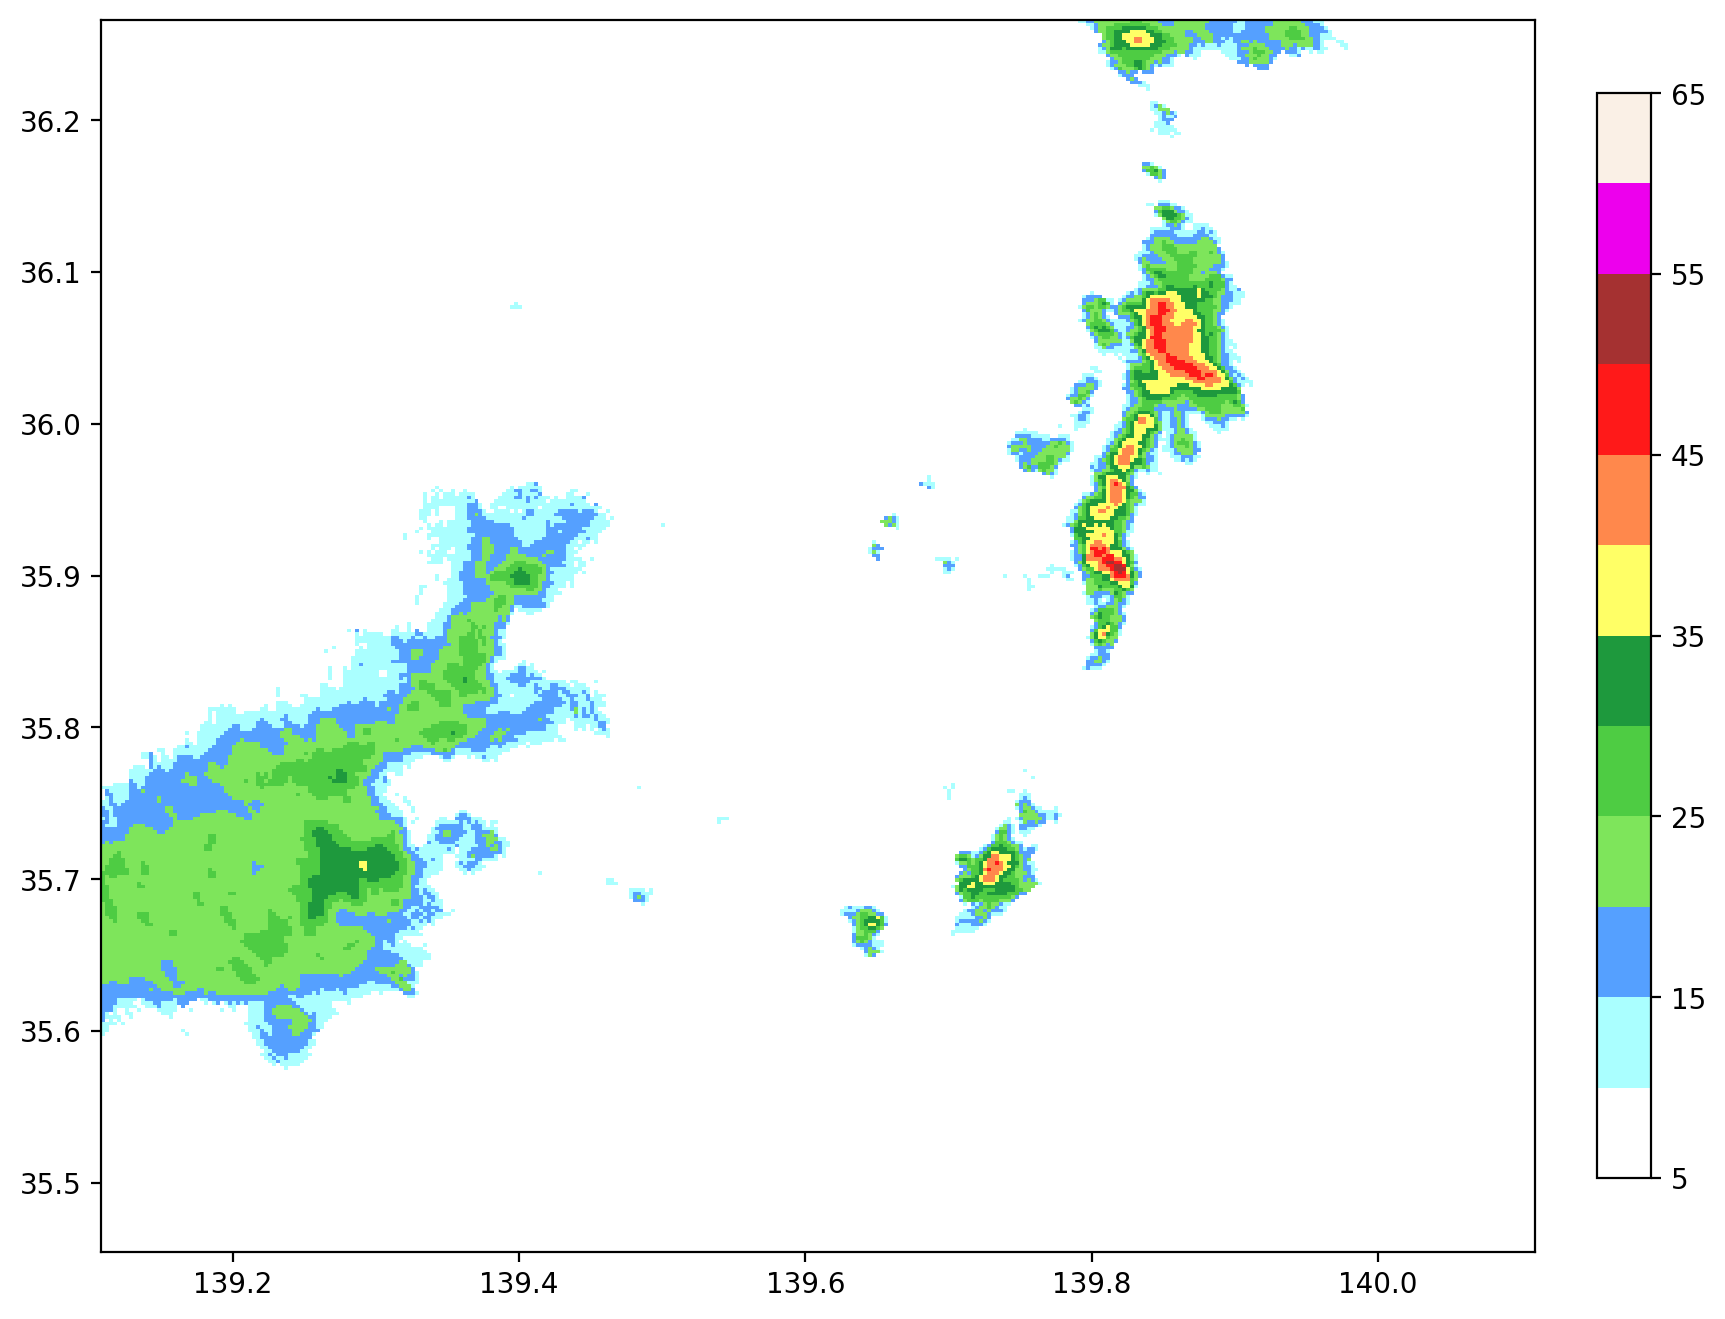

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import cmaps

fig = plt.figure(figsize=(10, 8), dpi=200)
ax = fig.add_subplot(111)

cmap=cmaps.prcp_1
levels= matplotlib.ticker.MaxNLocator(nbins=12).tick_values(5,65)
norm = matplotlib.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
mdbz = np.amax(griddata, axis=0)
shadow = ax.pcolormesh(LAT, LON, mdbz, cmap=cmap, norm=norm)
cb = plt.colorbar(shadow, fraction=0.035, pad=0.04)